In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Cargar datos 
df = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
# Reagrupar calidades: 0 = baja (3, 4), 1 = media (5, 6), 2 = alta (7, 8)
def reclassify(quality):
    if quality <= 4:
        return 0
    elif quality <= 6:
        return 1
    else:
        return 2

df['label'] = df['quality'].apply(reclassify)


In [4]:
# Comprobación
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
# Separar variables
X = df.drop(['quality', 'label'], axis=1)
y = df['label']

In [6]:
# Dividir los datos (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Entrenar un modelo inicial con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [9]:
# Predicción
y_pred = knn.predict(X_test_scaled)

In [10]:
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.84375
Matriz de Confusión:
 [[  0  11   0]
 [  1 250  11]
 [  0  27  20]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.95      0.91       262
           2       0.65      0.43      0.51        47

    accuracy                           0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.81      0.84      0.82       320



**¿Qué nos dicen las métricas?**  
**Clase 1 (calidad media):**

    Precision: 87%

    Recall: 95%

    ➜ El modelo es muy bueno reconociendo vinos de calidad media (los más comunes en el dataset).

**Clase 0 (baja calidad):**

    Muy pocos ejemplos → el modelo no acierta ninguno.

    Esto es típico si hay muy poco entrenamiento de esa clase.

**Clase 2 (alta calidad):**

    Precision: 65%

    Recall: 43%

    ➜ El modelo predice algunos bien, pero confunde muchos con clase media.



In [11]:
# Optimización de k
accuracy_list = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracy_list.append(accuracy_score(y_test, y_pred_k))

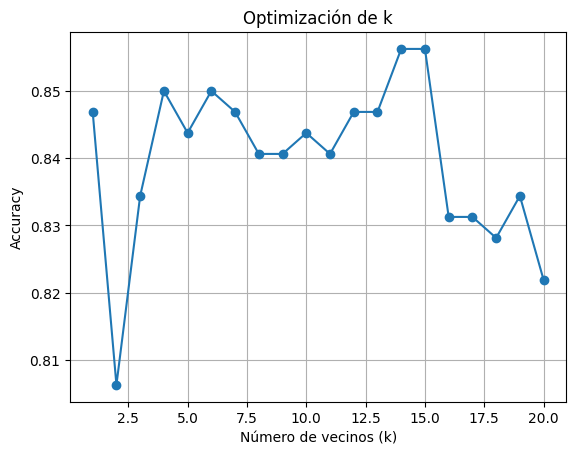

In [12]:
# Graficar
plt.plot(range(1, 21), accuracy_list, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy')
plt.title('Optimización de k')
plt.grid(True)
plt.show()

In [13]:
# Mejor k
best_k = accuracy_list.index(max(accuracy_list)) + 1
print("Mejor valor de k:", best_k)

Mejor valor de k: 14


In [ ]:
# Entrenar modelo final con k=14
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=14)

In [15]:
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.84375
Matriz de Confusión:
 [[  0  11   0]
 [  1 250  11]
 [  0  27  20]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.95      0.91       262
           2       0.65      0.43      0.51        47

    accuracy                           0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.81      0.84      0.82       320



| Métrica                | k = 5                           | k = 14                          |
|------------------------|----------------------------------|----------------------------------|
| **Accuracy**           | ~0.84375                        | **0.85625**  |
|                        |                                  |                                  |
| **Clase 0 (baja)**     | precision: 0.00 <br> recall: 0.00 <br> f1: 0.00 | precision: 0.00 <br> recall: 0.00 <br> f1: 0.00 |
| **Clase 1 (media)**    | precision: 0.87 <br> recall: 0.95 <br> f1: 0.91 | **precision: 0.86** <br> **recall: 0.98** <br> **f1: 0.92**  |
| **Clase 2 (alta)**     | precision: 0.65 <br> recall: 0.43 <br> f1: 0.51 | **precision: 0.75** <br> recall: 0.38 <br> f1: 0.51 |
|                        |                                  |                                  |
| **Macro avg**          | precision: 0.50 <br> recall: 0.46 <br> f1: 0.47 | precision: 0.54 <br> recall: 0.45 <br> f1: 0.47 |
| **Weighted avg**       | precision: 0.81 <br> recall: 0.84 <br> f1: 0.82 | **precision: 0.82** <br> recall: 0.86 <br> f1: 0.83  |

**Interpretación:**

    Accuracy mejora ligeramente con k=14 → más estable.

    Clase 1 (media calidad) es reconocida aún mejor con k=14, especialmente en recall (¡98%!).

    Clase 2 (alta calidad) mejora en precisión con k=14, pero el recall baja un poco.

    Clase 0 (baja calidad) no se predice correctamente en ninguno de los dos modelos → indica desbalance severo (muy pocos ejemplos en esa clase).

**Conclusión:**

    k=14 te da mejor rendimiento global y más robustez.

    Si queremos mejorar las predicciones en clases minoritarias (baja y alta calidad), deberiamos considerar:

        Técnicas de re-muestreo como SMOTE.

        Algoritmos más robustos como Random Forest o XGBoost.

        Ajuste de pesos de clase en los modelos.

In [16]:
# Función para predecir calidad del vino
def predict_wine_quality(features):

    input_scaled = scaler.transform([features])
    prediction = knn.predict(input_scaled)[0]

    if prediction == 0:
        return "Este vino probablemente sea de baja calidad 🍷"
    elif prediction == 1:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de alta calidad 🍷"


In [17]:
# Ejemplo
predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Este vino probablemente sea de calidad media 🍷'